In [56]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

# 数据加载
data = pd.read_csv('car_data.csv', encoding='gbk')
# data = pd.read_csv('Mall_Customers.csv')
train_x = data.iloc[:,1:]

In [57]:
train_x.head()

,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
0,8.05,86.20,95.92,37.71
1,8.34,80.50,103.57,20.62
2,3.39,45.60,99.03,23.32
3,3.13,49.68,98.96,18.60
4,5.79,56.62,99.11,19.62


In [42]:
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)

## K-Means

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
result.head()

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,聚类结果
0,北京,8.05,86.20,95.92,37.71,2
1,天津,8.34,80.50,103.57,20.62,1
2,河北,3.39,45.60,99.03,23.32,0
3,山西,3.13,49.68,98.96,18.60,0
4,内蒙古,5.79,56.62,99.11,19.62,2


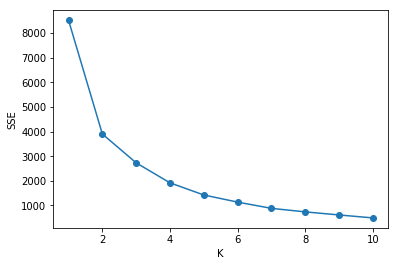

In [58]:
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
    # kmeans算法
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

## 层次聚类

In [64]:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

model = AgglomerativeClustering(linkage = "ward", n_clusters = 4)
predict_y = model.fit_predict(train_x)
#print(predict_y)

result = pd.DataFrame(data).join(pd.DataFrame(predict_y))
#print(result)
result.rename({0:u"层级聚类结果"}, axis = 1, inplace = True)
result.head()

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,层级聚类结果
0,北京,8.05,86.20,95.92,37.71,3
1,天津,8.34,80.50,103.57,20.62,3
2,河北,3.39,45.60,99.03,23.32,1
3,山西,3.13,49.68,98.96,18.60,0
4,内蒙古,5.79,56.62,99.11,19.62,2


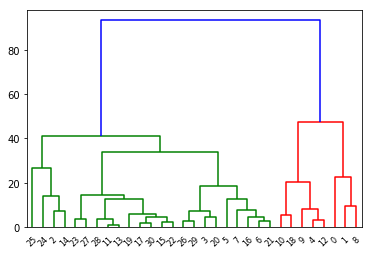

In [62]:
linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()